In [1]:
import time
start_time = time.time()
import progressbar
import os
import numpy as np
from keras.preprocessing import image
import cv2
import dlib
import pandas as pd
import matplotlib.pyplot as plt
import sys

Using TensorFlow backend.


In [2]:
from keras.preprocessing import image
from sklearn import svm, datasets
from sklearn.dummy import DummyClassifier
from sklearn.svm import SVC
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split, GridSearchCV, learning_curve, ShuffleSplit
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, recall_score, precision_score, f1_score
import matplotlib.pyplot as plt

In [3]:
cwd = os.getcwd()

print(cwd)

C:\Users\User\Desktop\4th_year_AMLS\zceecyt-AMLSassignment19_20-16053203\Project-16053203\Notebook\A2


In [4]:
import landmarks_v2 as l2

In [5]:
def get_data():
    return l2.extract_features_labels()
    
def split_data(X, Y):

    X, Y = shuffle(X,Y)
    tr_X, te_X, tr_Y, te_Y = train_test_split(X, Y, train_size=0.7)
    
    return tr_X, tr_Y, te_X, te_Y

In [6]:
X,y = get_data()

print(X.shape)
print(y.shape)

(4798, 68, 2)
(4798,)


In [7]:
print (os.path.abspath(os.curdir))
# sklearn functions implementation
def img_SVM(training_images, training_labels, test_images, test_labels):
    #classifier = ...
    classifier = SVC(kernel = 'rbf')
    classifier.fit(training_images, training_labels)
    pred = classifier.predict(test_images)
    print("Accuracy:", accuracy_score(test_labels, pred))

    print(pred)
    return pred

C:\Users\User\Desktop\4th_year_AMLS\zceecyt-AMLSassignment19_20-16053203\Project-16053203\Notebook\A2


In [8]:
Y = np.array([y, -(y - 1)]).T

tr_X, tr_Y, te_X, te_Y = split_data(X, Y)

In [9]:
print(tr_X)
print(tr_X.shape)
print(tr_Y)
print(tr_Y.shape)

[[[ 53 102]
  [ 53 114]
  [ 54 127]
  ...
  [ 93 153]
  [ 89 153]
  [ 86 153]]

 [[ 54 111]
  [ 53 122]
  [ 53 132]
  ...
  [ 89 162]
  [ 83 162]
  [ 78 159]]

 [[ 38 109]
  [ 39 121]
  [ 39 134]
  ...
  [ 95 154]
  [ 90 155]
  [ 85 154]]

 ...

 [[ 50 112]
  [ 50 124]
  [ 53 136]
  ...
  [ 90 155]
  [ 86 156]
  [ 82 156]]

 [[ 42 109]
  [ 42 121]
  [ 43 133]
  ...
  [ 93 152]
  [ 89 152]
  [ 84 151]]

 [[ 36 112]
  [ 37 125]
  [ 39 138]
  ...
  [ 97 164]
  [ 90 166]
  [ 83 165]]]
(3358, 68, 2)
[[ 0.  1.]
 [ 1. -0.]
 [ 0.  1.]
 ...
 [ 0.  1.]
 [ 0.  1.]
 [ 1. -0.]]
(3358, 2)


In [10]:
def reshapeX(X):
    return X.reshape((X.shape[0], X.shape[1] * X.shape[2]))

def reshapeY(y):
    return list(zip(*y))[0]

tr_X = reshapeX(tr_X)
te_X = reshapeX(te_X)
tr_Y = reshapeY(tr_Y)
te_Y = reshapeY(te_Y)

In [11]:
print(tr_X.shape)

(3358, 136)


In [12]:
gamma='scale'

for C in [0.1,1]:
    for degree in [1, 2, 3, 4]:
                
        lin_svc = svm.SVC(kernel='linear', C=C).fit(tr_X, tr_Y)
        print(C, "Linear:", lin_svc.score(te_X, te_Y))

        rbf_svc = svm.SVC(kernel='rbf', gamma=gamma, C=C).fit(tr_X, tr_Y)
        print( C, gamma, "Rbf:", rbf_svc.score(te_X, te_Y))

        poly_svc = svm.SVC(kernel='poly', degree=degree, C=C).fit(tr_X, tr_Y)
        print( C, degree, "Poly", poly_svc.score(te_X, te_Y))

0.1 Linear: 0.8833333333333333
0.1 scale Rbf: 0.8638888888888889
0.1 1 Poly 0.8381944444444445
0.1 Linear: 0.8833333333333333
0.1 scale Rbf: 0.8638888888888889
0.1 2 Poly 0.8819444444444444
0.1 Linear: 0.8833333333333333
0.1 scale Rbf: 0.8638888888888889
0.1 3 Poly 0.8923611111111112
0.1 Linear: 0.8833333333333333
0.1 scale Rbf: 0.8638888888888889
0.1 4 Poly 0.8895833333333333
1 Linear: 0.88125
1 scale Rbf: 0.8819444444444444
1 1 Poly 0.8805555555555555
1 Linear: 0.88125
1 scale Rbf: 0.8819444444444444
1 2 Poly 0.8909722222222223
1 Linear: 0.88125
1 scale Rbf: 0.8819444444444444
1 3 Poly 0.8909722222222223
1 Linear: 0.88125
1 scale Rbf: 0.8819444444444444
1 4 Poly 0.8805555555555555


In [13]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn import preprocessing
from sklearn.calibration import CalibratedClassifierCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC as svc
from sklearn.metrics import make_scorer, roc_auc_score
from scipy import stats

In [14]:
# svc_list = []

# lin_svc = svm.SVC(kernel='linear', C=C).fit(tr_X, tr_Y)
# # print(C, "Linear:", lin_svc.score(te_X, te_Y))

# rbf_svc = svm.SVC(kernel='rbf', gamma=gamma, C=C).fit(tr_X, tr_Y)
# # print( C, gamma, "Rbf:", rbf_svc.score(te_X, te_Y))

# poly_svc = svm.SVC(kernel='poly', degree=degree, C=C).fit(tr_X, tr_Y)
# # print( C, degree, "Poly", poly_svc.score(te_X, te_Y))

# svc_list.append({
#     'lin_svc': lin_svc,
#     'rbf_svc': rbf_svc,
#     'poly_svc': poly_svc,
#     'C': C,
#     'gamma': gamma,
#     'degree': degree
# })

# #define model and performance measure
# svc_list=svc(probability=True, random_state=1)
# auc=make_scorer(roc_auc_score)

# #random search for 20 combinations of parameters
# rand_list = {"C":stats.uniform(2,10),
#             "gamma":stats.uniform(0.1,1),
#             "degree":stats.uniform(1,3)}

# rand_search = RandomizedSearchCV(svc_list, param_distributions = rand_list, n_iter=20, n_jobs=4, cv=3, random_state=2017, scoring=auc)
# rand_search.fit(tr_X, tr_Y)
# rand_search.cv_results_

# print(rand_search.best_params_)

In [15]:
from scipy import stats
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import make_scorer, roc_auc_score

lin = {'C': stats.uniform(0.1, 10), 'kernel': ['linear']}

rbf = {'C': stats.uniform(0.1, 10), 'gamma': stats.uniform(0.0001, 0.01), 'kernel': ['rbf']}

poly = {'C': stats.uniform(0.1, 10), 'degree': stats.uniform(1, 4), 'kernel': ['poly']}

def randomSearch(X, y, param_kernel):
    param_distributions = param_kernel #a dictionary with parameters names (string) as keys of parameters to try
    #number of jobs = -1 is using all processors 
    #n_iter trades off runtime with quality of solution
    #cv is at default value for 5-fold cross validation
    #verbose gives out messages; refit is to refit an estimator to find the best parameters
    #random_state is a pseudo random number generator used for random uniform sampling from list of possible values instead of using scipy.stats distributions
    searchrand = RandomizedSearchCV(SVC(), param_distributions, n_iter=10, n_jobs=-1, refit=True, verbose=3)
    searchrand.fit(X, y)
    searchrand.cv_results_
    
    print(searchrand.cv_results_)
    return searchrand.best_params_, searchrand.best_estimator_  

# Obtaining optimum hyperparameters and classifier for different kernel
linSVC_param, lin_SVC = randomSearch(tr_X, tr_Y, lin)
rbfSVC_param, rbf_SVC = randomSearch(tr_X, tr_Y, rbf)
polySVC_param, poly_SVC = randomSearch(tr_X, tr_Y, poly)
#print(datetime.now() - start)

# Display optimum hyperparameters for SVC kernel
print('Optimum hyperparameters for linear kernel: ')
print(linSVC_param)
print('Optimum hyperparameters for rbf kernel: ')
print(rbfSVC_param)
print('Optimum hyperparameters for polynomial kernel: ')
print(polySVC_param)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:  7.9min
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed: 28.5min finished


{'mean_fit_time': array([400.80139494, 538.49239306,  17.65369396,   7.81171327,
        41.64108553, 192.01543632, 322.46819577, 329.44228659,
       424.1146215 , 126.04632816]), 'std_fit_time': array([70.98557415, 81.71060174,  4.91992829,  1.44484651, 10.39114032,
       31.36696971, 58.43911756, 44.54945308, 64.80757117, 13.97002939]), 'mean_score_time': array([0.15863762, 0.12085757, 0.14118257, 0.15977316, 0.17186217,
       0.14660802, 0.19892607, 0.14094357, 0.13927064, 0.19012823]), 'std_score_time': array([0.0524834 , 0.02620326, 0.04722609, 0.02749045, 0.05047574,
       0.03987824, 0.06951642, 0.04299676, 0.04881716, 0.09788289]), 'param_C': masked_array(data=[8.289201197335963, 9.526844180770912,
                   0.40975237342552584, 0.17748177516883393,
                   1.0213665830480967, 3.877342532131062,
                   6.705315405330591, 5.671501017217367,
                   6.710647365165169, 2.843400583324572],
             mask=[False, False, False, False,

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:   23.4s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:  1.0min finished


{'mean_fit_time': array([ 8.68377085,  5.98329096,  7.59525213,  5.87685466,  7.25729589,
       10.95472288,  6.25171213,  4.8093122 , 10.37855711,  6.67294598]), 'std_fit_time': array([2.4025252 , 0.51670927, 2.11827536, 1.78783724, 1.30544977,
       0.87320179, 2.44635122, 1.3454972 , 1.04944177, 1.76363093]), 'mean_score_time': array([1.36754317, 0.99394765, 1.07340884, 0.61830721, 0.7442533 ,
       1.55478454, 0.40756412, 0.50524964, 1.27479763, 0.98456712]), 'std_score_time': array([0.66497406, 0.34608563, 0.6382039 , 0.38274394, 0.37101972,
       0.43070884, 0.15360504, 0.26471879, 0.4316135 , 0.35425333]), 'param_C': masked_array(data=[3.855846633886476, 0.25211141589487773,
                   0.8583359525193023, 3.848571868734744,
                   4.772494070037802, 2.45613450344774, 6.395926987933676,
                   6.737918761934683, 7.197570214226971,
                   0.5696948523720967],
             mask=[False, False, False, False, False, False, False, False,


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:   19.0s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:   55.7s finished


{'mean_fit_time': array([ 3.84333124,  2.60282216,  6.91416435, 24.58545017,  4.19138379,
        3.44308996, 13.73647084, 11.3574183 ,  2.39140563,  2.71302729]), 'std_fit_time': array([1.02169828, 0.72575571, 0.1280471 , 8.51385683, 0.16106818,
       0.16054509, 2.78192752, 3.47185185, 0.16421536, 0.26462323]), 'mean_score_time': array([0.43573446, 0.26933236, 1.29274349, 0.19428091, 0.3520587 ,
       0.69992867, 0.31755099, 0.22579627, 0.44540915, 0.39087639]), 'std_score_time': array([0.24086435, 0.13440785, 0.0772725 , 0.11436624, 0.02197747,
       0.0555336 , 0.10958269, 0.10351472, 0.07433598, 0.11499369]), 'param_C': masked_array(data=[2.4622400818492984, 9.036736547077092,
                   0.33309539074202965, 10.042722361320083,
                   7.26980567917283, 4.905651639897962, 4.202466022460782,
                   3.5607386168299238, 3.1371086345011467,
                   8.372495353403359],
             mask=[False, False, False, False, False, False, False, False

In [16]:
print(lin_SVC.score(te_X, te_Y))
print(rbf_SVC.score(te_X, te_Y))
print(poly_SVC.score(te_X, te_Y))

0.8833333333333333
0.86875
0.8847222222222222


In [17]:
import landmarks_v2_test as l1 

In [18]:
def get_data():
    return l1.extract_features_labels()

In [19]:
A,b = get_data()

print(A.shape)
print(b.shape)

(970, 68, 2)
(970,)


In [20]:
B = np.array([b, -(b - 1)]).T
def reshapeX(A):
    return A.reshape((A.shape[0], A.shape[1] * A.shape[2]))

def reshapeY(b):
    return list(zip(*b))[0]

te_A = reshapeX(A)
te_B = reshapeY(B)

[[420  53]
 [ 49 448]]

Confusion Matrix


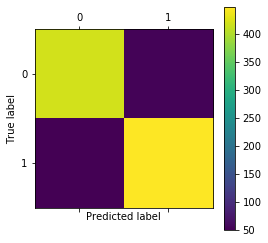

[[0.43298969 0.05463918]
 [0.05051546 0.46185567]]

Confusion Matrix(normalised)


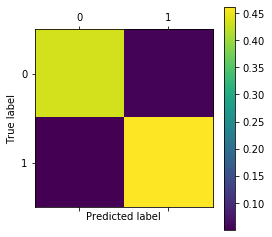

              precision    recall  f1-score   support

         0.0       0.90      0.89      0.89       473
         1.0       0.89      0.90      0.90       497

    accuracy                           0.89       970
   macro avg       0.89      0.89      0.89       970
weighted avg       0.89      0.89      0.89       970

Accuracy achieved: 0.8948453608247423 ♡♡♡


In [21]:
# op_lin_results = optimised_lin.predict(te_X)
op_lin_results = lin_SVC.predict(te_A)

# cm = confusion_matrix(te_Y, op_lin_results)
cm = confusion_matrix(te_B, op_lin_results)
print(cm)
plt.matshow(cm)
plt.colorbar()
plt.ylabel('True label')
plt.xlabel('Predicted label')
print('\nConfusion Matrix')
plt.show()

# cm2 = confusion_matrix(te_Y, op_lin_results, normalize='all')
cm2 = confusion_matrix(te_B, op_lin_results, normalize='all')
print(cm2)
plt.matshow(cm2)
plt.colorbar()
plt.ylabel('True label')
plt.xlabel('Predicted label')
print('\nConfusion Matrix(normalised)')
plt.show()

print(classification_report(te_B, op_lin_results))
print('Accuracy achieved:', accuracy_score(te_B, op_lin_results), '\u2661''\u2661''\u2661')

[[413  60]
 [ 67 430]]

Confusion Matrix


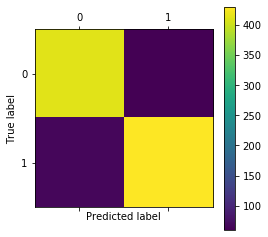

[[0.4257732  0.06185567]
 [0.06907216 0.44329897]]

Confusion Matrix(normalised)


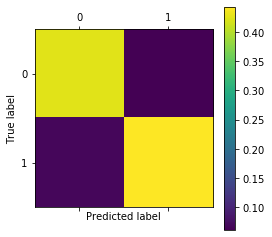

              precision    recall  f1-score   support

         0.0       0.86      0.87      0.87       473
         1.0       0.88      0.87      0.87       497

    accuracy                           0.87       970
   macro avg       0.87      0.87      0.87       970
weighted avg       0.87      0.87      0.87       970

Accuracy achieved: 0.8690721649484536 ♡♡♡


In [22]:
# optimised_rbf = svm.SVC(kernel = 'rbf', gamma = rbfSVC_param['gamma'], C = rbfSVC_param['C'])
# optimised_rbf.fit(tr_X, tr_Y)
# op_rbf_results = optimised_rbf.predict(te_X)
op_rbf_results = rbf_SVC.predict(te_A)

# cm = confusion_matrix(te_Y, op_rbf_results)
cm = confusion_matrix(te_B, op_rbf_results)
print(cm)
plt.matshow(cm)
plt.colorbar()
plt.ylabel('True label')
plt.xlabel('Predicted label')
print('\nConfusion Matrix')
plt.show()

# cm2 = confusion_matrix(te_Y, op_rbf_results, normalize='all')
cm2 = confusion_matrix(te_B, op_rbf_results, normalize='all')
print(cm2)
plt.matshow(cm2)
plt.colorbar()
plt.ylabel('True label')
plt.xlabel('Predicted label')
print('\nConfusion Matrix(normalised)')
plt.show()

print(classification_report(te_B, op_rbf_results))
print('Accuracy achieved:', accuracy_score(te_B, op_rbf_results), '\u2661''\u2661''\u2661')

[[428  45]
 [ 46 451]]

Confusion Matrix


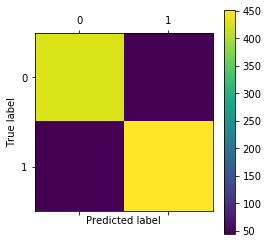

[[0.44123711 0.04639175]
 [0.04742268 0.46494845]]

Confusion Matrix(normalised)


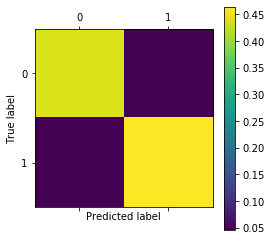

              precision    recall  f1-score   support

         0.0       0.90      0.90      0.90       473
         1.0       0.91      0.91      0.91       497

    accuracy                           0.91       970
   macro avg       0.91      0.91      0.91       970
weighted avg       0.91      0.91      0.91       970

Accuracy achieved: 0.9061855670103093 ♡♡♡


In [23]:
# optimised_poly = svm.SVC(kernel = 'poly', degree = polySVC_param['degree'], C = polySVC_param['C'])
# optimised_poly.fit(tr_X, tr_Y)
# op_p_results = optimised_poly.predict(te_X)
op_p_results = poly_SVC.predict(te_A)

# cm = confusion_matrix(te_Y, op_p_results)
cm = confusion_matrix(te_B, op_p_results)
print(cm)
plt.matshow(cm)
plt.colorbar()
plt.ylabel('True label')
plt.xlabel('Predicted label')
print('\nConfusion Matrix')
plt.show()

# cm2 = confusion_matrix(te_Y, op_p_results, normalize='all')
cm2 = confusion_matrix(te_B, op_p_results, normalize='all')
print(cm2)
plt.matshow(cm2)
plt.colorbar()
plt.ylabel('True label')
plt.xlabel('Predicted label')
print('\nConfusion Matrix(normalised)')
plt.show()

print(classification_report(te_B, op_p_results))
print('Accuracy achieved:', accuracy_score(te_B, op_p_results), '\u2661''\u2661''\u2661')

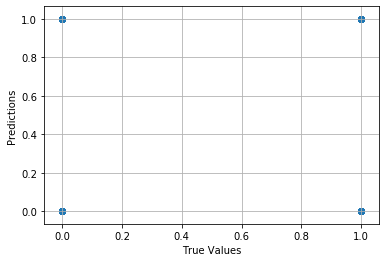

In [24]:
plt.scatter(te_B, op_p_results)
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.grid()
plt.show()

Automatically created module for IPython interactive environment


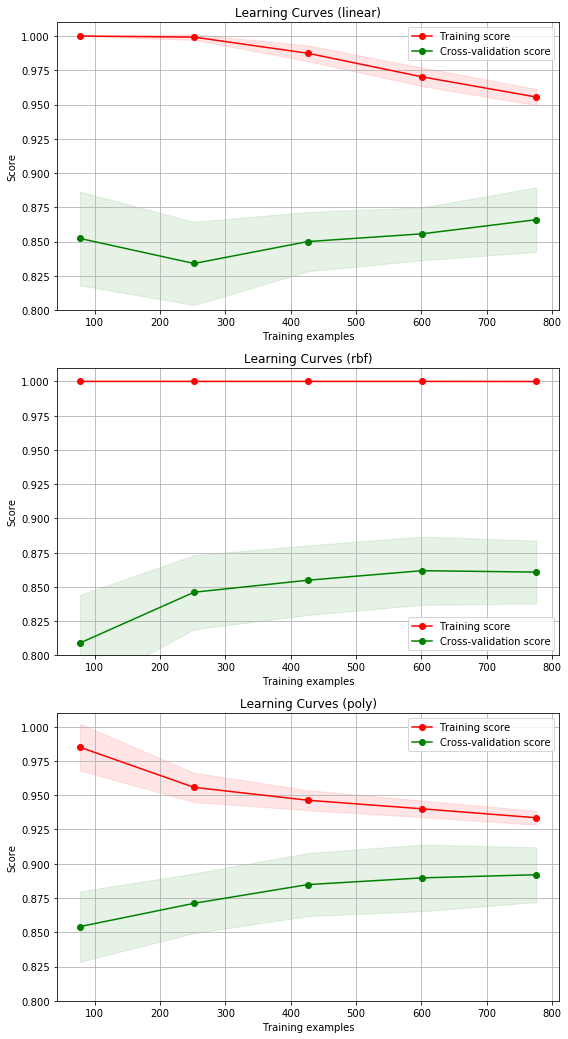

In [26]:
print(__doc__)

from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit


def plot_learning_curve(estimator, title, X, y, axes=None, ylim=None, cv=None,
                        n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):

    axes.set_title(title)
    if ylim is not None:
        axes.set_ylim(*ylim)
        axes.set_xlabel("Training examples")
        axes.set_ylabel("Score")

        train_sizes, train_scores, test_scores, fit_times, _ = \
            learning_curve(estimator, X, y, cv=cv, n_jobs=n_jobs,
                           train_sizes=train_sizes,
                           return_times=True)
        train_scores_mean = np.mean(train_scores, axis=1)
        train_scores_std = np.std(train_scores, axis=1)
        test_scores_mean = np.mean(test_scores, axis=1)
        test_scores_std = np.std(test_scores, axis=1)
        fit_times_mean = np.mean(fit_times, axis=1)
        fit_times_std = np.std(fit_times, axis=1)

    # Plot learning curve
        axes.grid()
        axes.fill_between(train_sizes, train_scores_mean - train_scores_std,
                             train_scores_mean + train_scores_std, alpha=0.1,
                             color="r")
        axes.fill_between(train_sizes, test_scores_mean - test_scores_std,
                             test_scores_mean + test_scores_std, alpha=0.1,
                             color="g")
        axes.plot(train_sizes, train_scores_mean, 'o-', color="r",
                     label="Training score")
        axes.plot(train_sizes, test_scores_mean, 'o-', color="g",
                     label="Cross-validation score")
        axes.legend(loc="best")

    return plt

plt.figure(figsize=(9,18))

cv = ShuffleSplit(n_splits=20, test_size=0.2, random_state=0)


# estimator = poly_SVC 
# plot_learning_curve(estimator, title, te_X, te_Y, axes=axes, ylim=(0.8, 1.01), cv=cv, n_jobs=-1)
axes = plt.subplot(311)
title = r"Learning Curves (linear)"
plot_learning_curve(lin_SVC, title, te_A, te_B, axes=axes, ylim=(0.8, 1.01), cv=cv, n_jobs=-1)

axes = plt.subplot(312)
title = r"Learning Curves (rbf)"
plot_learning_curve(rbf_SVC, title, te_A, te_B, axes=axes, ylim=(0.8, 1.01), cv=cv, n_jobs=-1)

axes = plt.subplot(313)
title = r"Learning Curves (poly)"
plot_learning_curve(poly_SVC, title, te_A, te_B, axes=axes, ylim=(0.8, 1.01), cv=cv, n_jobs=-1)


plt.show()

In [ ]:
print("--- %s seconds ---" % (time.time() - start_time))